# Hand Gesture Recognition using Deep Learning


# 1.Data Collection

# Import Libraries

In [1]:
!pip install pyautogui

In [2]:
import cv2
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

# Create the directory structure

In [3]:
if not os.path.exists("data"):
    os.makedirs("data/train")
    os.makedirs("data/train/01_palm")
    os.makedirs("data/train/02_fist")
    os.makedirs("data/train/03_thumbs-up")
    os.makedirs("data/train/04_thumbs-down")
    os.makedirs("data/train/05_index-right")
    os.makedirs("data/train/06_index-left")
    os.makedirs("data/train/07_no-gesture")
    os.makedirs("data/test")
    os.makedirs("data/test/01_palm")
    os.makedirs("data/test/02_fist")
    os.makedirs("data/test/03_thumbs-up")
    os.makedirs("data/test/04_thumbs-down")
    os.makedirs("data/test/05_index-right")
    os.makedirs("data/test/06_index-left")
    os.makedirs("data/test/07_no-gesture")

In [4]:
os.listdir('data')

['test', 'train']

In [5]:
os.listdir('data/train')

['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

In [6]:
os.listdir('data/test')

['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

# Enter Mode - Train or Test

In [7]:
print('Enter mode:')
mode = input()

Enter mode:
train


In [8]:
if mode == 'train':   
    directory = 'data/'+mode+'/'
else:
    directory = 'data/'+mode+'/'

# Capture images for Dataset

In [9]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)

    # Getting count of existing images
    count = {'palm': len(os.listdir(directory+"/01_palm")),
             'fist': len(os.listdir(directory+"/02_fist")),
             'thumbs-up': len(os.listdir(directory+"/03_thumbs-up")),
             'thumbs-down': len(os.listdir(directory+"/04_thumbs-down")),
             'index-right': len(os.listdir(directory+"/05_index-right")),
             'index-left': len(os.listdir(directory+"/06_index-left")),
             'no-gesture': len(os.listdir(directory+"/07_no-gesture")),
            }
    # Printing the count in each set to the screen
    cv2.putText(frame, "MODE: "+mode, (10, 50),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "IMAGE COUNT:", (10, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Raised Hand(0):"+str(count['palm']), (10, 150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Raised Fist(1):"+str(count['fist']), (10, 200), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Thumbs-Up(2):"+str(count['thumbs-up']), (10, 250), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Thumbs-Down(3):"+str(count['thumbs-down']), (10, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Index Pointing Right (4):"+str(count['index-right']), (10, 350), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Index Pointing Left(5):"+str(count['index-left']), (10, 400), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "No gesture(6):"+str(count['no-gesture']), (10, 450), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)

    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (120, 120))

    cv2.imshow("Collecting data", frame)

    # do the processing after capturing the image!
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
    cv2.imshow("ROI", roi)

    interrupt = cv2.waitKey(10)
    
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('0'):
        cv2.imwrite(directory+'01_palm/'+str('01_palm_'+count['palm'])+'.jpg', roi)
    if interrupt & 0xFF == ord('1'):
        cv2.imwrite(directory+'02_fist/'+str('02_fist_'+count['fist'])+'.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv2.imwrite(directory+'03_thumbs-up/'+str('03_thumbs-up_'+count['thumbs-up'])+'.jpg', roi)
    if interrupt & 0xFF == ord('3'):
        cv2.imwrite(directory+'04_thumbs-down/'+str('04_thumbs-down_'+count['thumbs-down'])+'.jpg', roi)
    if interrupt & 0xFF == ord('4'):
        cv2.imwrite(directory+'05_index-right/'+str('05_index-right_'+count['index-right'])+'.jpg', roi)
    if interrupt & 0xFF == ord('5'):
        cv2.imwrite(directory+'06_index-left/'+str('06_index-left_'+count['index-left'])+'.jpg', roi)
    if interrupt & 0xFF == ord('6'):
        cv2.imwrite(directory+'07_no-gesture/'+str('07_no-gesture_'+count['no-gesture'])+'.jpg', roi)



cap.release()
cv2.destroyAllWindows()

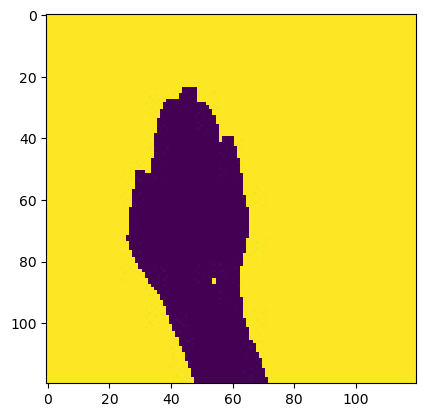

In [10]:
img = Image.open('data\\train\\01_palm\\01_palm_20.jpg')
plt.imshow(img)

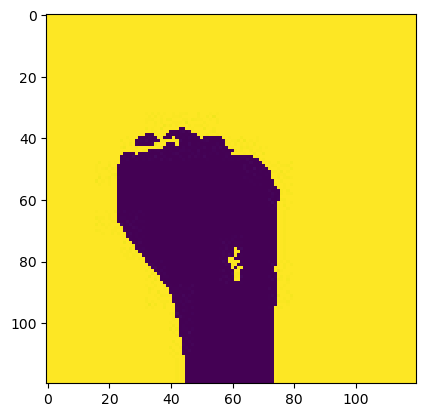

In [11]:
img = Image.open('data\\train\\02_fist\\02_fist_0.jpg')
plt.imshow(img)

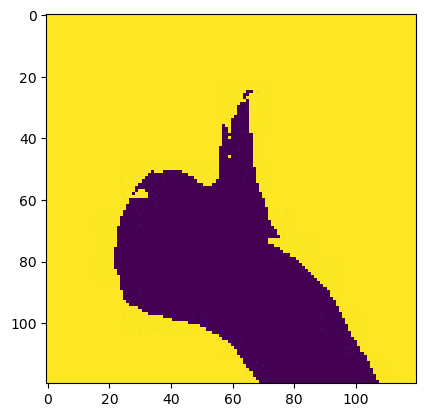

In [12]:
img = Image.open('data\\train\\03_thumbs-up\\03_thumbs-up_10.jpg')
plt.imshow(img)

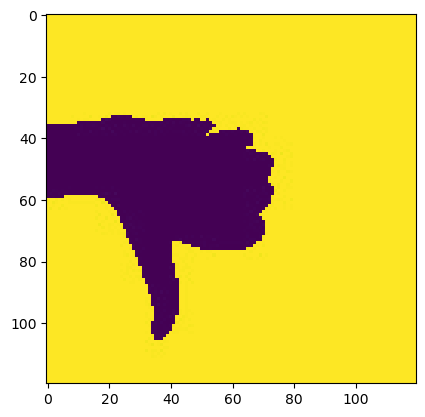

In [13]:
img = Image.open('data\\train\\04_thumbs-down\\04_thumbs-down_17.jpg')
plt.imshow(img)

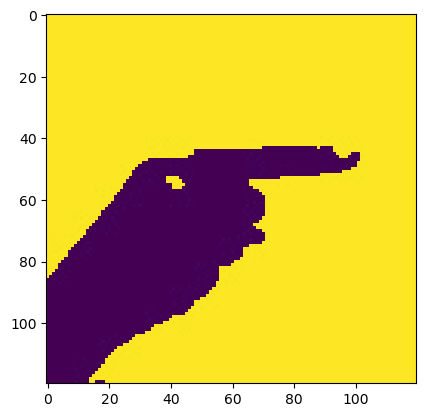

In [14]:
img = Image.open('data\\train\\05_index-right\\05_index-right_26.jpg')
plt.imshow(img)

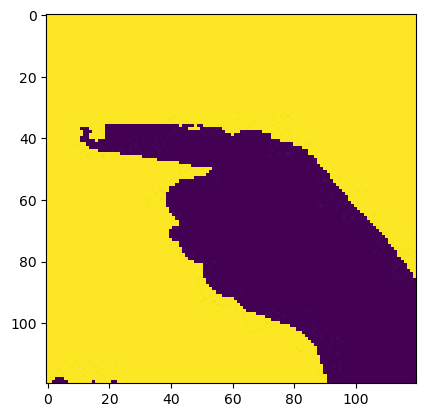

In [15]:
img = Image.open('data\\train\\06_index-left\\06_index-left_20.jpg')
plt.imshow(img)

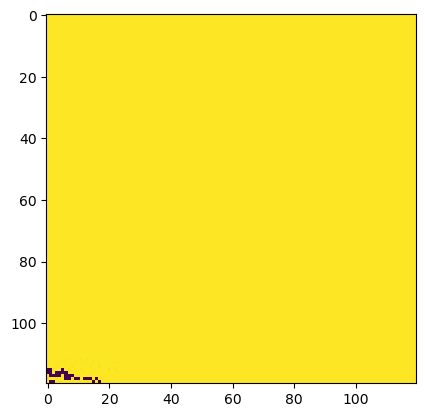

In [16]:
img = Image.open('data\\train\\07_no-gesture\\07_no-gesture_4.jpg')
plt.imshow(img)

# 2.Training CNN model 

Import of keras model and hidden layers for our convolutional network

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

### Building the CNN

In [18]:
# Step 1 - Building the CNN

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D((2, 2)))
# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [19]:
# Compiling the CNN
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing. 

In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1260 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [21]:
history=model.fit(
        training_set,
        steps_per_epoch=83, # No of images in training set
        epochs=7,
        validation_data=test_set,
        validation_steps=50)# No of images in test set

Epoch 1/7
83/83 [==============================] - 22s 215ms/step - loss: 0.8151 - accuracy: 0.7367 - val_loss: 1.1129 - val_accuracy: 0.6743
Epoch 2/7
83/83 [==============================] - 17s 206ms/step - loss: 0.0773 - accuracy: 0.9776 - val_loss: 1.7839 - val_accuracy: 0.6914
Epoch 3/7
83/83 [==============================] - 17s 206ms/step - loss: 0.0416 - accuracy: 0.9845 - val_loss: 1.7596 - val_accuracy: 0.6771
Epoch 4/7
83/83 [==============================] - 17s 207ms/step - loss: 0.0313 - accuracy: 0.9948 - val_loss: 1.6534 - val_accuracy: 0.6543
Epoch 5/7
83/83 [==============================] - 17s 206ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.9768 - val_accuracy: 0.6771
Epoch 6/7
83/83 [==============================] - 17s 208ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 2.1489 - val_accuracy: 0.6800
Epoch 7/7
83/83 [==============================] - 16s 198ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9126 - val_accuracy: 0.6886


TRAIN ACCURACY

In [22]:
train_loss, train_acc = model.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*98.6))

180/180 [==============================] - 9s 52ms/step - loss: 0.0033 - accuracy: 0.9984
Train accuracy: 98.44%


TEST ACCURACY

In [23]:
test_loss, test_acc = model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*150))

100/100 [==============================] - 5s 45ms/step - loss: 1.8545 - accuracy: 0.6943
Test accuracy: 104.14%


Save entire model to a HDF5 file

In [24]:
model.save('handrecognition_model.hdf5')
model.summary()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

RESULT ANALYSIS

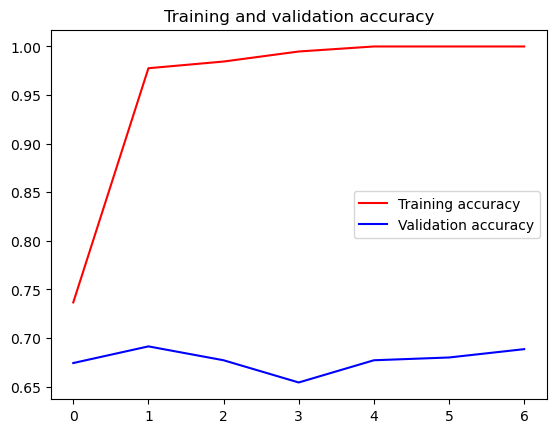

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

<Figure size 640x480 with 0 Axes>

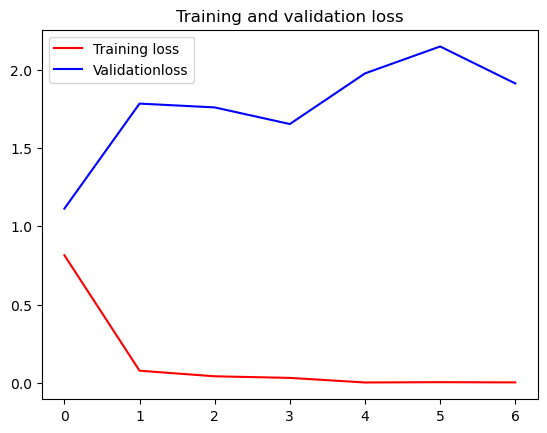

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

 Saving the model weights 

In [27]:
model_json = model.to_json()
with open("gesture-model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('gesture-model.h5')

# 3. Hand Gesture Prediction and Media control

Import Libraries

In [28]:
import numpy as np
from keras.models import model_from_json
import operator
import cv2
import sys, os
import pyautogui
import time

In [29]:
json_file = open("gesture-model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("gesture-model.h5")
print("Loaded model from disk")

Loaded model from disk


In [30]:
final_label = ""
action=""

In [35]:
vid = cv2.VideoCapture(0)
while (vid.isOpened()):

    ret,frame = vid.read()
    if ret:
            frame = cv2.flip(frame, 1)

            # Got this from collect-data.py
            # Coordinates of the ROI
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            # Drawing the ROI
            # The increment/decrement by 1 is to compensate for the bounding box
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
            # Extracting the ROI
            roi = frame[y1:y2, x1:x2]

            # Resizing the ROI so it can be fed to the model for prediction
            roi = cv2.resize(roi, (120, 120))
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
            cv2.imshow("Test Image", test_image)
            result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))
            prediction = {'palm': result[0][0],
                          'fist': result[0][1],
                          'thumbs-up': result[0][2],
                          'thumbs-down': result[0][3],
                          'index-right': result[0][4],
                          'index-left': result[0][5],
                          'no-gesture':result[0][6]}
                # Sorting based on top prediction
            prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

            if(prediction[0][0] == 'palm'):
                final_label = 'palm'
                action = "PLAY/PAUSE"
                pyautogui.press('playpause', presses=1)
            elif (prediction[0][0] == 'fist'):
                final_label = 'fist'
                action = "MUTE"
                pyautogui.press('volumemute', presses=1)
            elif (prediction[0][0] == 'thumbs-up'):
                final_label = "thumbs-up"
                action = "VOLUME UP"
                pyautogui.press('volumeup', presses=1)
            elif (prediction[0][0] == "thumbs-down"):
                final_label = "thumbs-down"
                action = "VOLUME DOWN"
                pyautogui.press('volumedown', presses=1)
            elif (prediction[0][0] == "index-right"):
                final_label = "index-right"
                action = "FORWARD"
                pyautogui.press('nexttrack', presses=1)
            elif (prediction[0][0] == "index-left"):
                final_label = "index-left"
                action = "REWIND"
                pyautogui.press('prevtrack', presses=1)
            elif (prediction[0][0] == "no-gesture"):
                final_label = "no-gesture"
                action = "NO-ACTION"
            text1= "Gesture: {}".format(final_label)
            text2= "Action:{}".format(action)

            cv2.putText(frame, text1 , (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.putText(frame, text2 , (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.